In [2]:
%matplotlib inline

from collections import defaultdict
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


In [9]:
data_files_lower = [
    "data/DM-42957/apdb-usdf-cass12-lower-20240220T140837.csv.gz",
    "data/DM-42957/apdb-usdf-cass12-lower-20240221T071112.csv.gz",
    "data/DM-42957/apdb-usdf-cass12-lower-20240221T221649.csv.gz",
    "data/DM-42957/apdb-usdf-cass12-lower-20240223T102905.csv.gz",
    "data/DM-42957/apdb-usdf-cass12-lower-20240225T122439.csv.gz",
]
data_files_upper = [
    "data/DM-42957/apdb-usdf-cass12-upper-20240220T141604.csv.gz",
    "data/DM-42957/apdb-usdf-cass12-upper-20240221T071108.csv.gz",
    "data/DM-42957/apdb-usdf-cass12-upper-20240221T221646.csv.gz",
    "data/DM-42957/apdb-usdf-cass12-upper-20240223T212524.csv.gz",
    "data/DM-42957/apdb-usdf-cass12-upper-20240225T122442.csv.gz",
]

In [10]:
frames_lower = [plots._read_csv(file, filter_count=False)[0] for file in data_files_lower]
frames_upper = [plots._read_csv(file, filter_count=False)[0] for file in data_files_upper]
df_z = pd.concat(frames_lower)
df_r = pd.concat(frames_upper)

In [11]:
# strip visits that did not measure read time
df_z = df_z[(df_z.index % 1000) < 100]
df_r = df_r[(df_r.index % 1000) < 100]

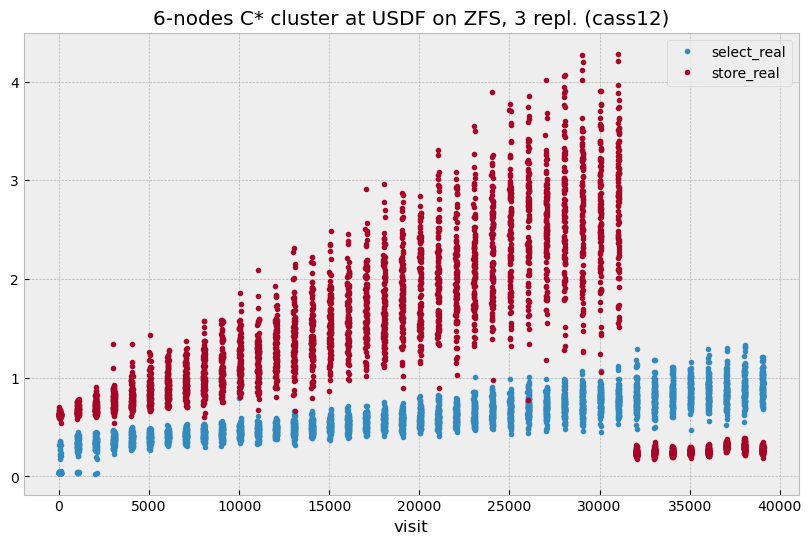

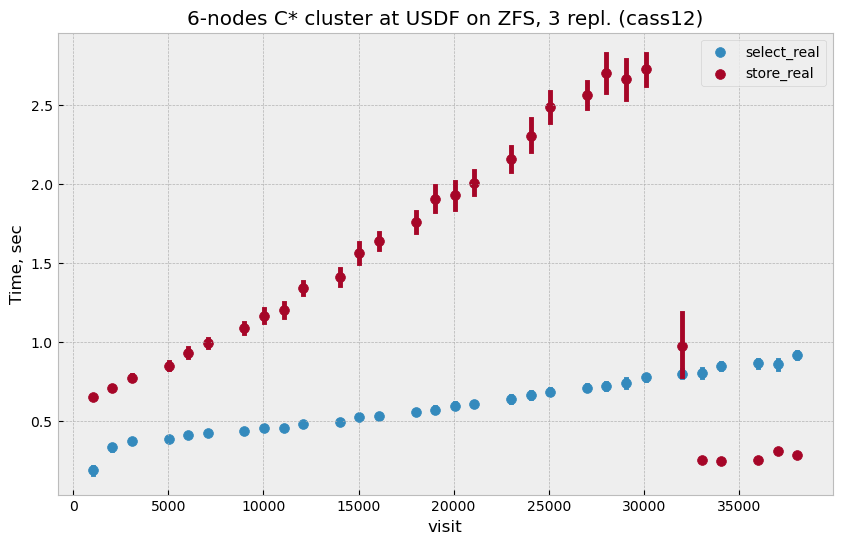

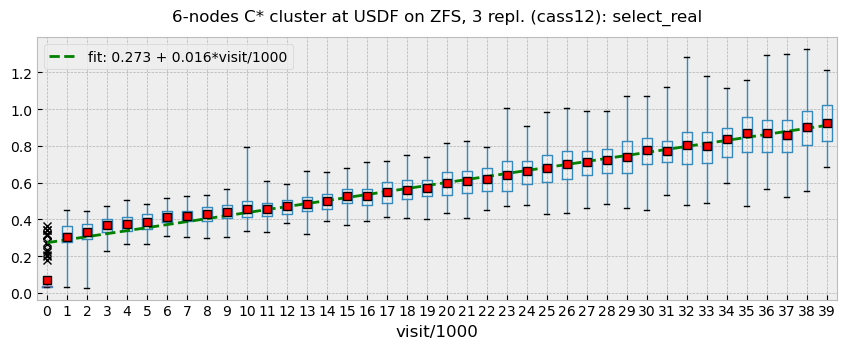

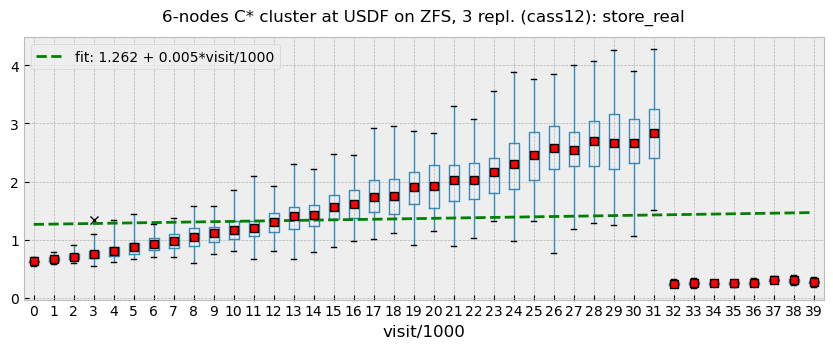

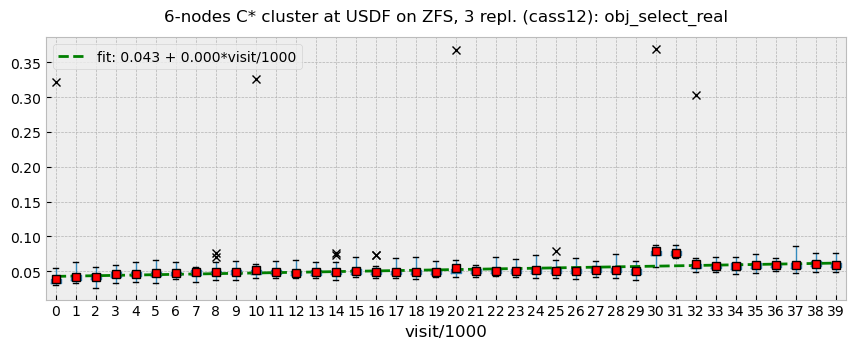

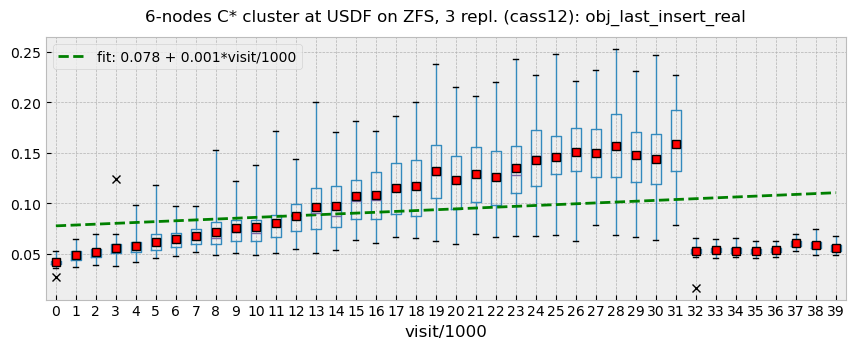

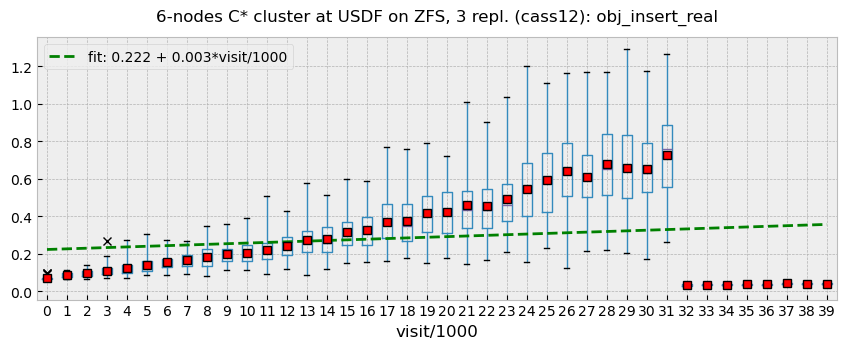

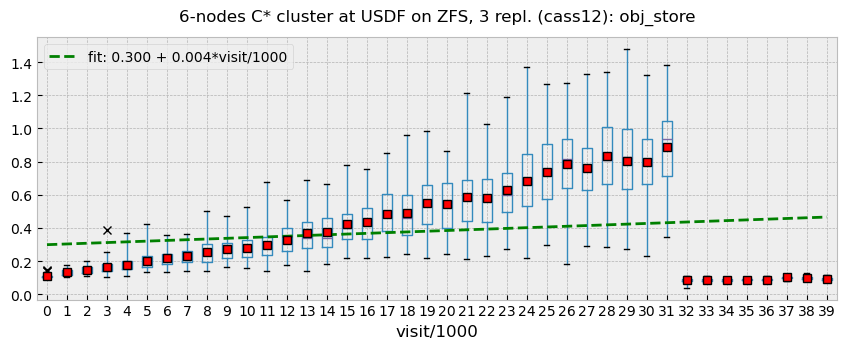

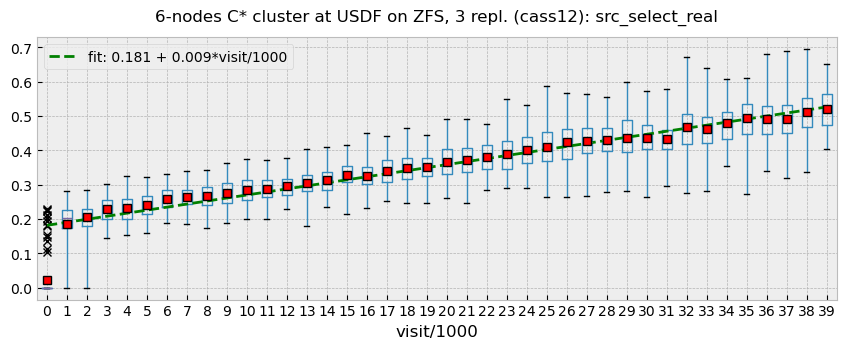

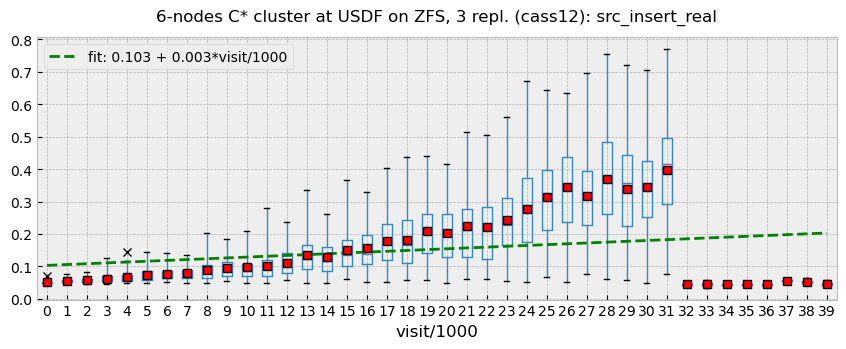

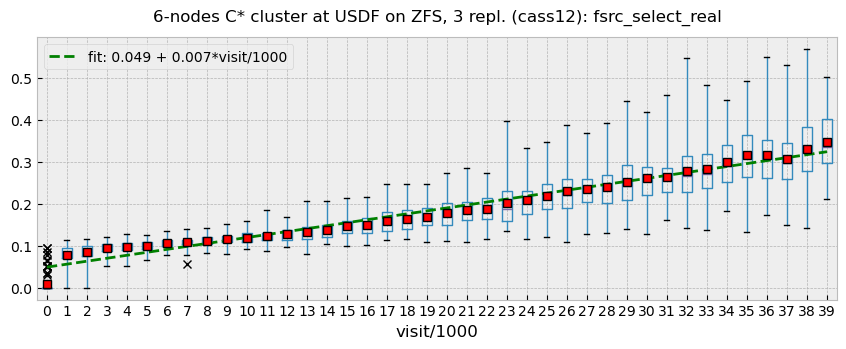

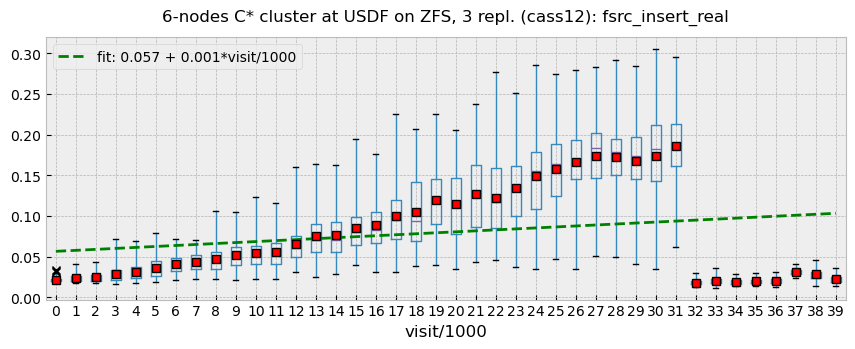

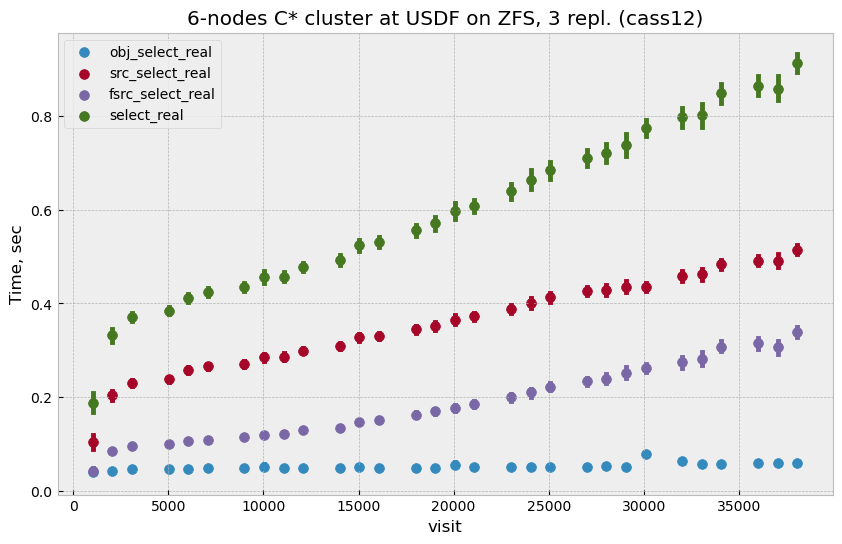

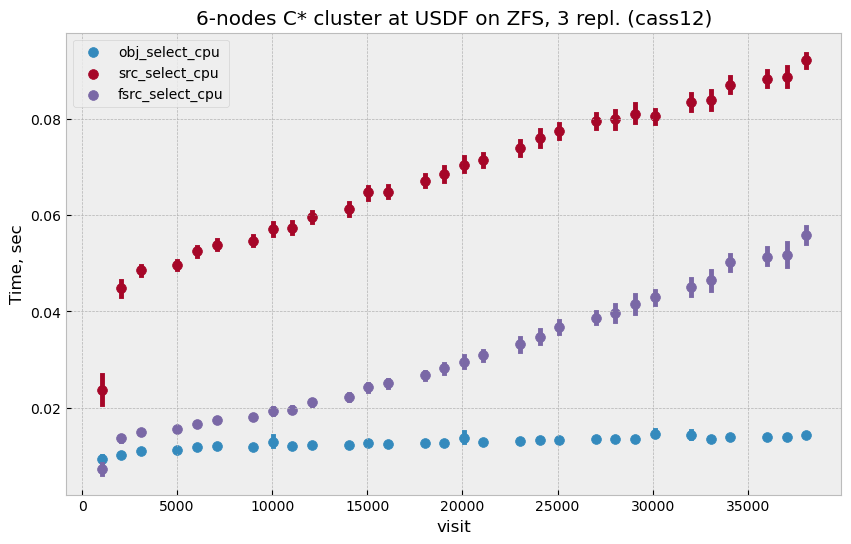

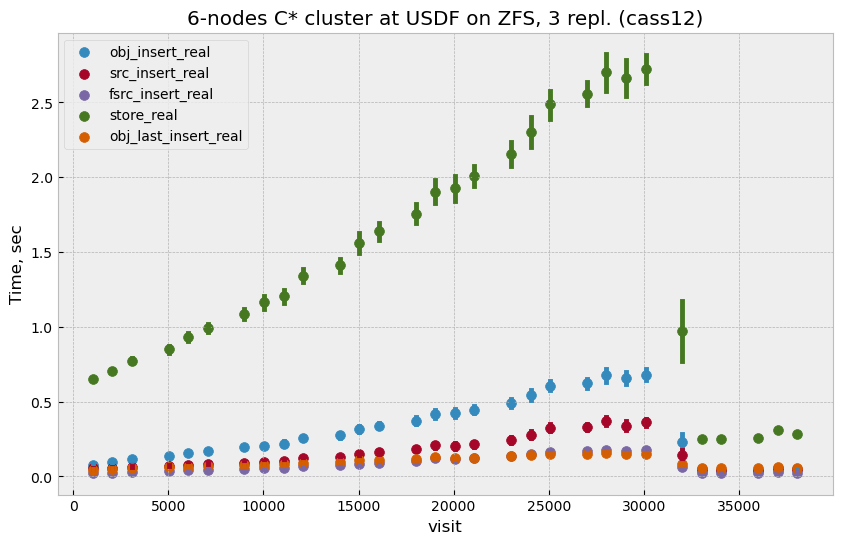

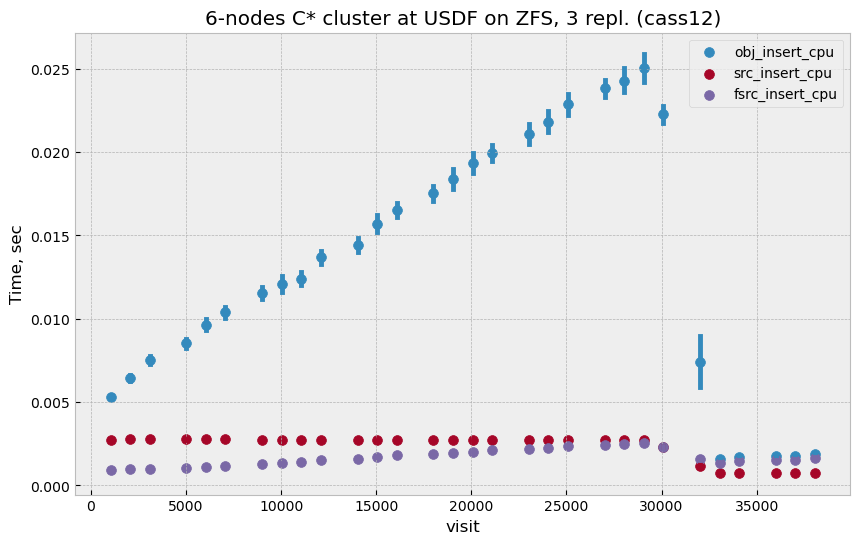

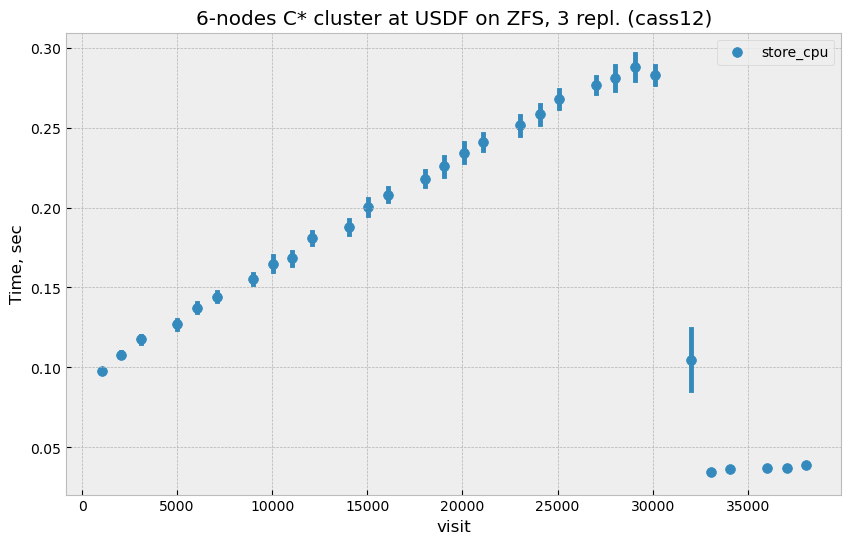

In [12]:
fit_modes = dict(
    store_real=None,
    obj_last_insert_real=None,
    src_insert_real=None,
    fsrc_insert_real=None,
    obj_insert_real=None,
    src_insert_cpu=None,
    fsrc_insert_cpu=None,
    obj_insert_cpu=None,
    store_cpu=None,
)

title = "6-nodes C* cluster at USDF on ZFS, 3 repl. (cass12)"
plots.do_plots_all(df_z, title, bin=1000, plots=all_plots, whis=whiskers, fit_mode=None, fit_nbins=30);

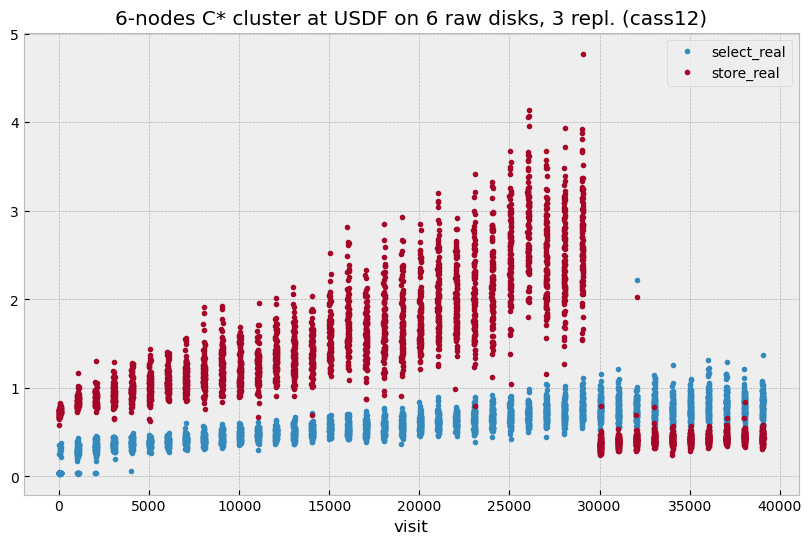

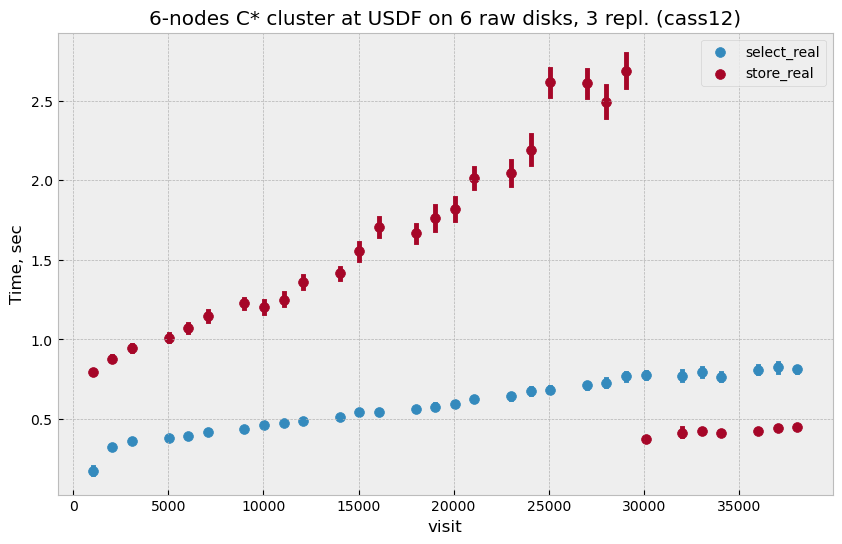

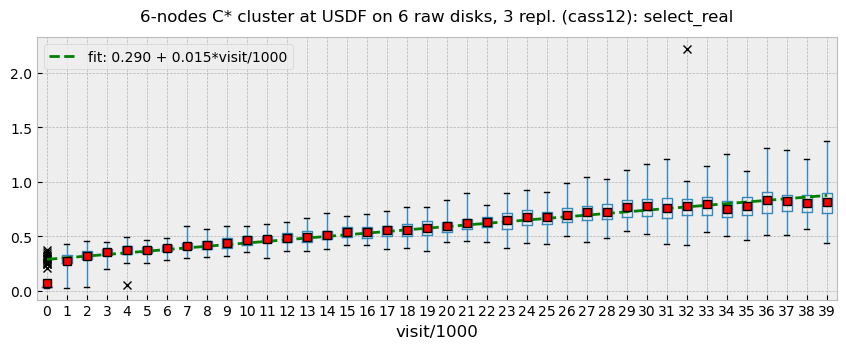

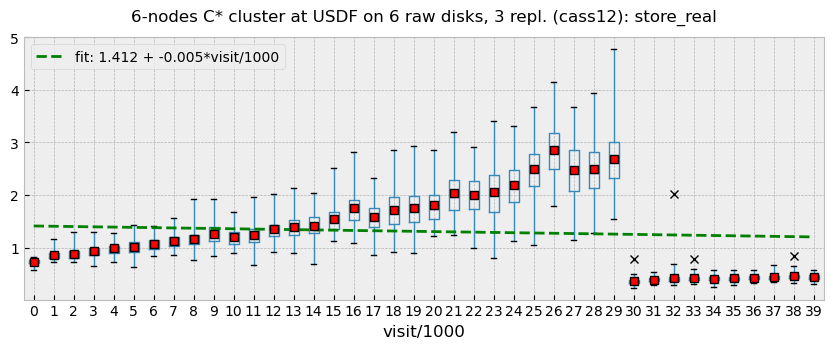

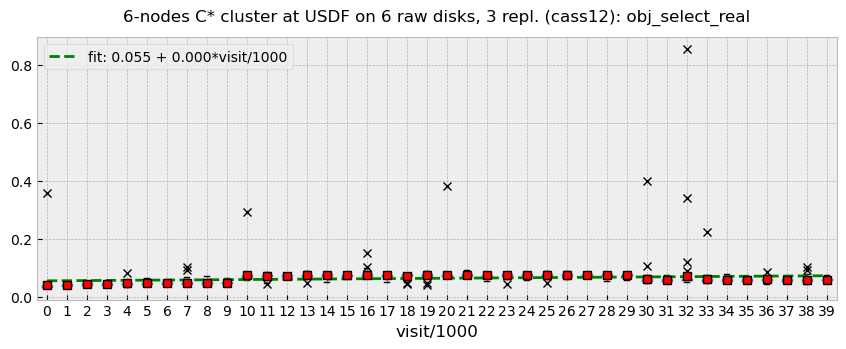

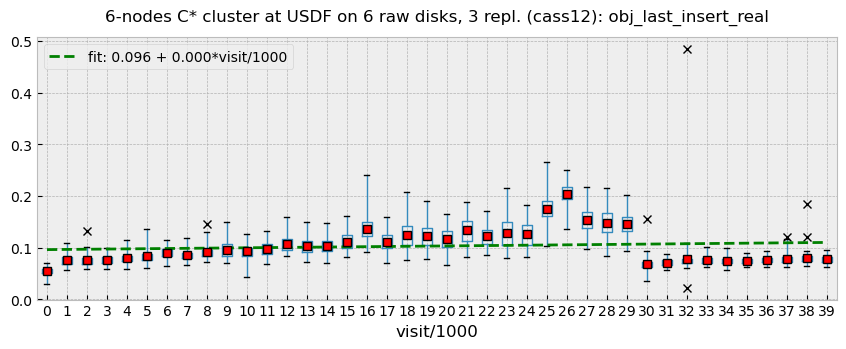

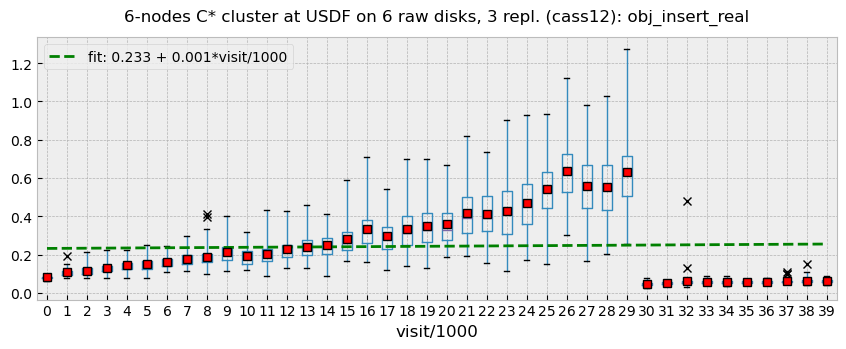

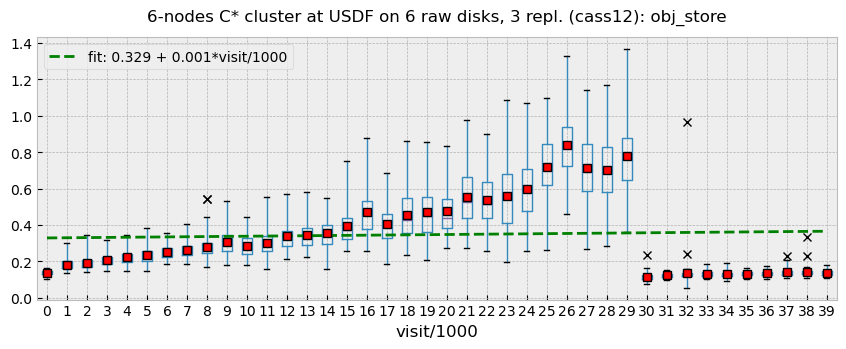

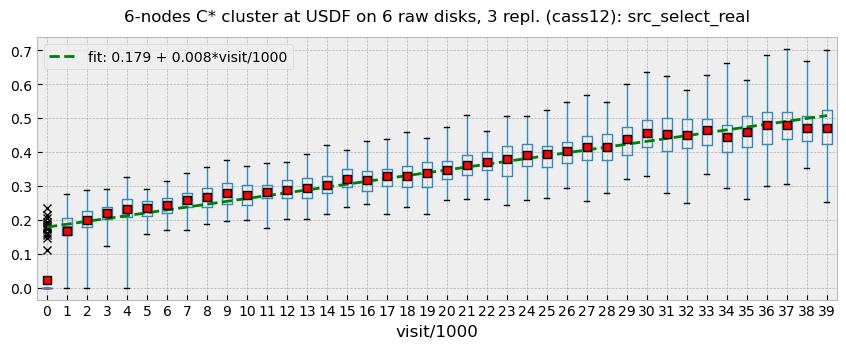

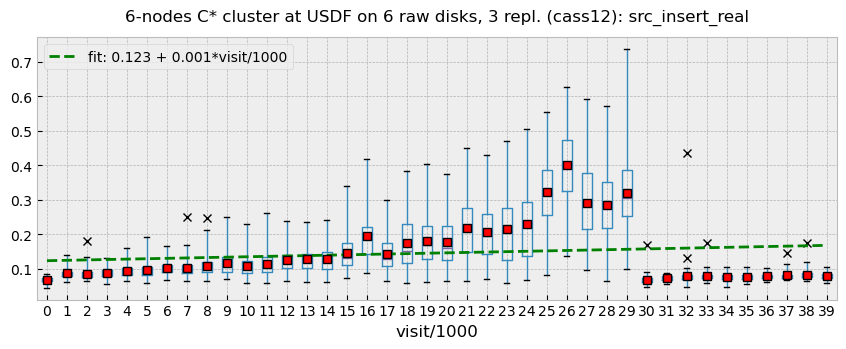

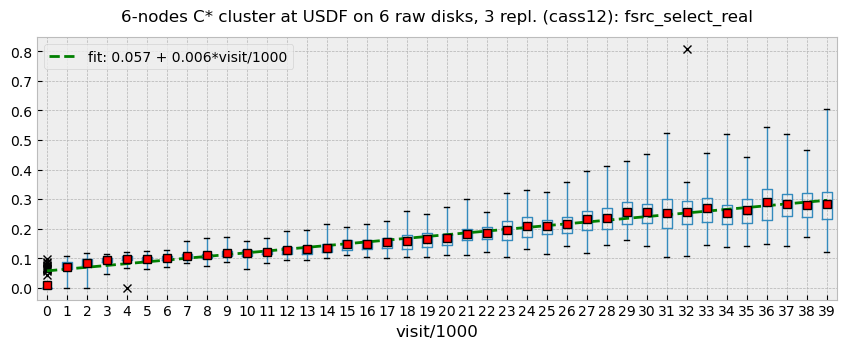

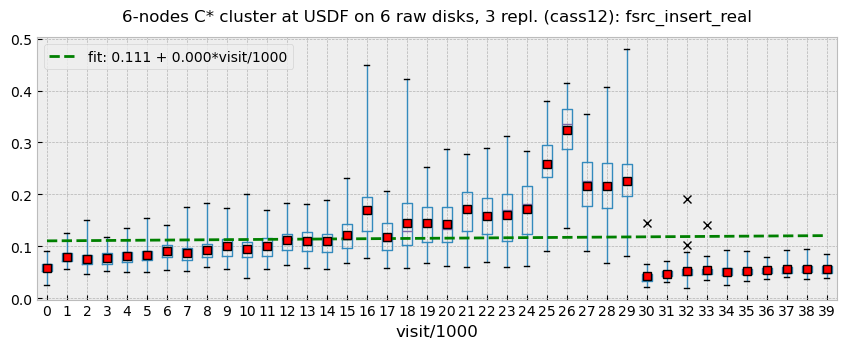

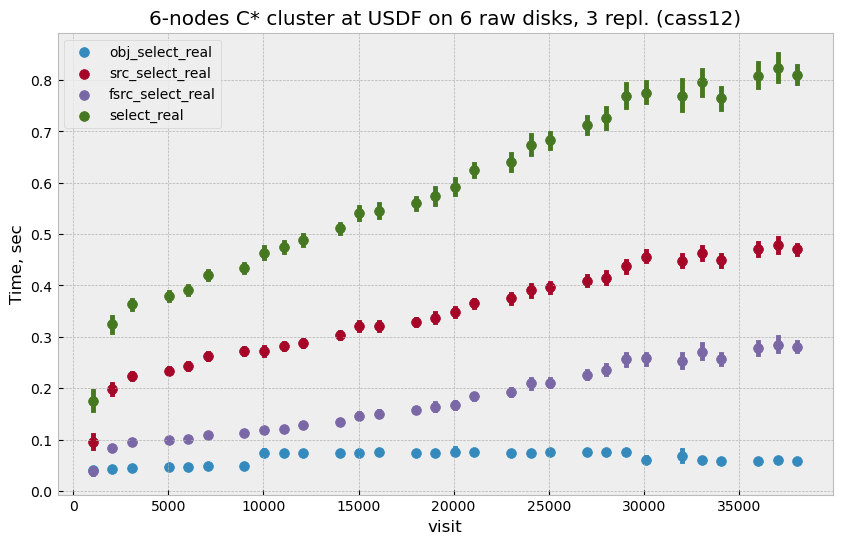

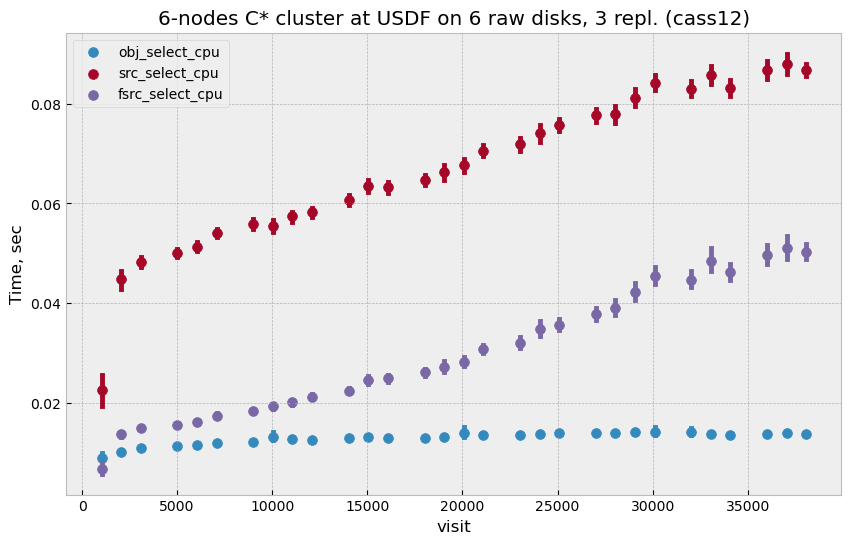

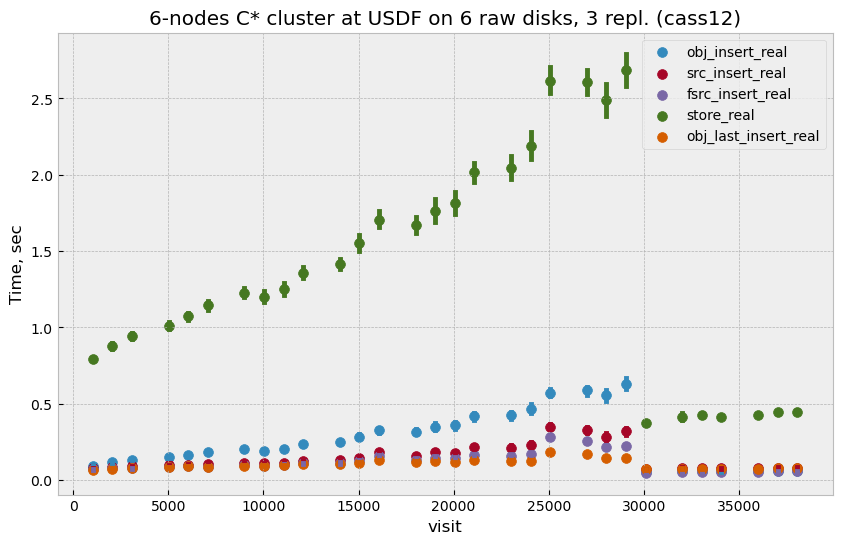

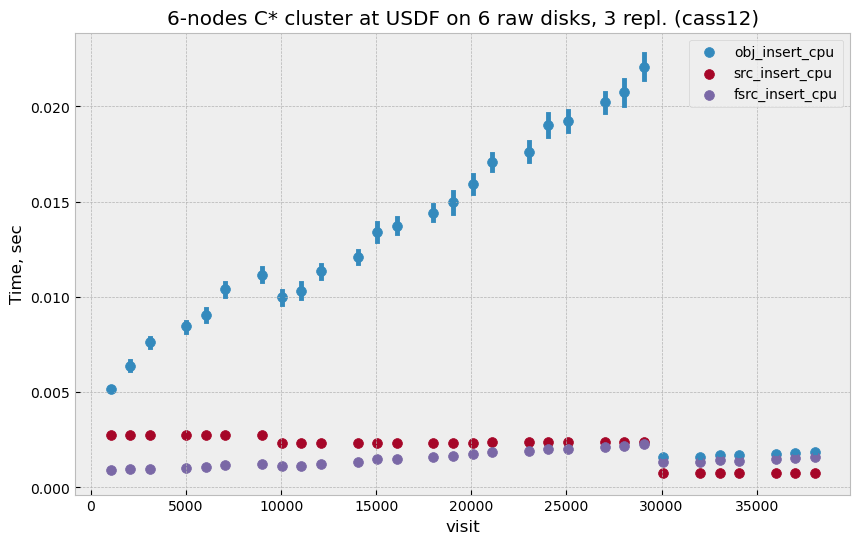

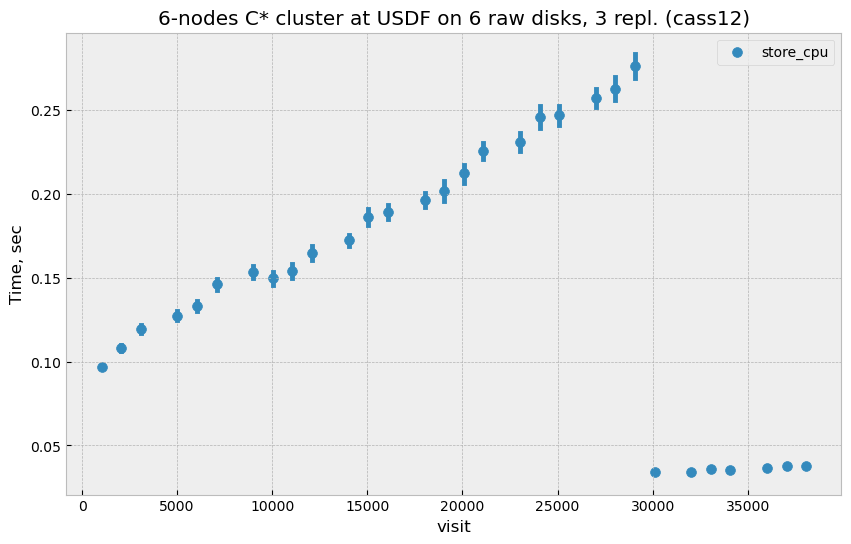

In [13]:
title = "6-nodes C* cluster at USDF on 6 raw disks, 3 repl. (cass12)"
plots.do_plots_all(df_r, title, bin=1000, plots=all_plots, whis=whiskers, fit_mode=None, fit_nbins=30);